# Using Historical Data to Predict Batting Success: Step 5 - OPS Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step5_ops_modelling`, the fifth of XXXXX notebooks.  TODO

## *Step 5 - Exploration and Modelling for an OPS Approach*

Baseball is full of statistics but one of the clearest statistics about a batter's effectiveness at the plate is the OPS, which is the sum of the player's On Base Percentage (an important indication of how often they get on base) and the player's Slugging Percentage (an indicator of the hitting power a player posesses, which can point to their ability to help their on-base teammates to score).

This approach for predicting batting success goes directly to this statistic and aims to explore how past data might have hints about a player's future with respect to the OPS statistic.

Generally speaking, a player with an OPS above 0.7666 is above average, with higher values classifying the player as increasingly excellent.  (Reference: https://en.wikipedia.org/wiki/On-base_plus_slugging)

## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1 and 4 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data file:
- `./data/step4_alldata.csv`

##  Loading Prepared Data Files

In [2]:
alldata_csv = "./data/step4_alldata.csv"
all_data = pd.read_csv(alldata_csv)
all_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,Career AVG,Career SLG,Career OBP,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y7,OPS Y8,OPS Y9,OPS Y10,AVG Y1,AVG Y2,AVG Y3,AVG Y4,AVG Y5,AVG Y6,AVG Y7,AVG Y8,AVG Y9,AVG Y10
0,willeed01,Ed Willett,704,649,56,129,25,10,5,68,25,174,6,24,0,10,0.198767,0.291217,0.235294,0.526511,0.000000,0.219780,0.367510,0.496266,0.379030,0.774655,0.456006,0.692935,0.621154,0.533333,0.000000,0.076923,0.164179,0.190909,0.134146,0.268293,0.165217,0.282609,0.234375,0.200000
1,daussho01,Hooks Dauss,1324,1125,107,212,41,15,6,112,145,288,8,41,0,15,0.188444,0.267556,0.285603,0.553158,1.000000,0.560802,0.578379,0.470550,0.731898,0.400920,0.559740,0.379742,0.542872,0.634387,0.250000,0.177215,0.216495,0.145631,0.222222,0.126437,0.181818,0.144330,0.170732,0.261364
2,coopewi01,Wilbur Cooper,1320,1232,111,295,34,18,6,103,46,139,4,35,0,15,0.239448,0.310877,0.269111,0.579987,0.368132,0.219780,0.462535,0.260180,0.455696,0.519551,0.591622,0.679654,0.537423,0.611333,0.153846,0.076923,0.206522,0.114754,0.215190,0.203883,0.242105,0.295238,0.221239,0.254098
3,mamaual01,Al Mamaux,466,421,39,77,12,2,1,31,27,90,3,12,0,12,0.182898,0.228029,0.237251,0.465279,0.000000,0.550000,0.363387,0.473844,0.475806,0.000000,0.479365,0.464706,0.431818,0.991071,0.000000,0.250000,0.163043,0.190909,0.225806,0.000000,0.174603,0.166667,0.181818,0.250000
4,ruthba01,Babe Ruth,10624,8400,2173,2872,506,137,714,2215,2063,1331,45,45,0,22,0.341905,0.689762,0.473925,1.163687,0.500000,0.952325,0.730611,0.856730,0.967903,1.114268,1.379841,1.355617,1.103689,1.313417,0.200000,0.315217,0.268116,0.325203,0.299685,0.319444,0.375546,0.377079,0.314496,0.394231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,perezhe01,Hernan Perez,1846,1745,188,436,74,11,45,180,76,397,1,12,12,10,0.249857,0.382235,0.279716,0.661951,1.000000,0.444664,0.533333,0.583502,0.730326,0.703826,0.676495,0.641605,0.333333,0.195489,0.500000,0.196970,0.200000,0.243346,0.272277,0.259259,0.253165,0.228448,0.166667,0.052632
2395,gomesya01,Yan Gomes,3274,3006,369,742,158,8,117,416,185,794,50,2,31,10,0.246840,0.421490,0.298594,0.720084,0.630983,0.825949,0.784906,0.658537,0.527451,0.707728,0.761775,0.704177,0.787218,0.722537,0.204082,0.293515,0.278351,0.231405,0.167331,0.231672,0.265509,0.222930,0.284404,0.252149
2396,simmoan01,Andrelton Simmons,4731,4366,493,1156,200,23,70,437,297,448,26,13,29,10,0.264773,0.369217,0.313480,0.682697,0.750827,0.691599,0.617196,0.659624,0.689723,0.751810,0.754196,0.673284,0.702389,0.557754,0.289157,0.247525,0.244444,0.265421,0.281250,0.278438,0.292419,0.263819,0.296610,0.223301
2397,mercejo03,Jordy Mercer,3416,3104,327,796,173,15,66,308,246,589,27,22,17,10,0.256443,0.385631,0.314968,0.700599,0.635674,0.771547,0.692806,0.613224,0.701352,0.732539,0.695653,0.747463,0.472727,0.671493,0.209677,0.285285,0.254941,0.243655,0.256262,0.254980,0.251269,0.269531,0.200000,0.254237


### Examining Relationships Between Features

The data used in this approach is much more straightforward than in the Hall of Fame Approach. We're looking at past OPS values to predict future OPS values. But we want to know which ones to pick.

In [3]:
import matplotlib.pyplot as plt

def scatter_plot(feature, target):
    plt.figure(figsize=(10, 8))
    plt.scatter(
        all_data[feature],
        all_data[target],
        c='lightgreen',        
        edgecolors=(0, 0, 0)
    )
    
    plt.xlim(0.0, 5.2)
#     plt.ylim(0.0, 1.4)


    plt.xlabel("{}".format(feature))
    plt.ylabel("{}".format(target))
    plt.show()

First, we'll see what we should use to predict the OPS of a player's sixth season, given they have played five seasons already.

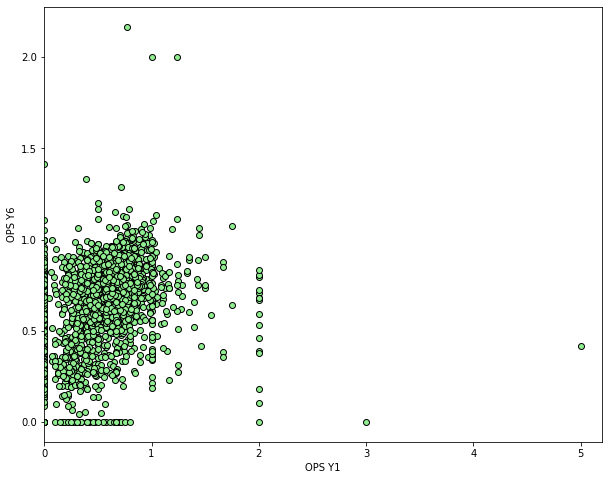

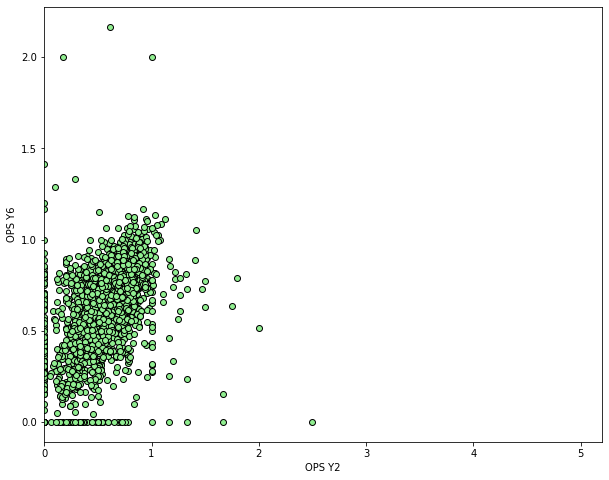

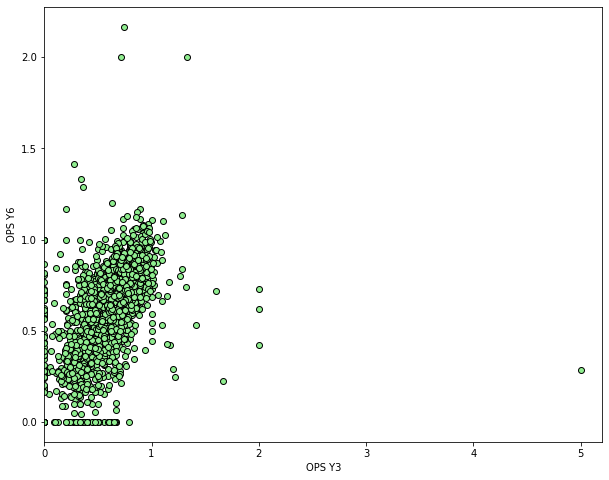

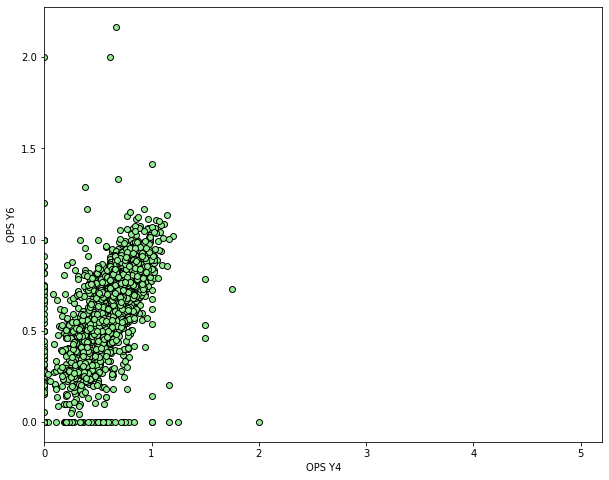

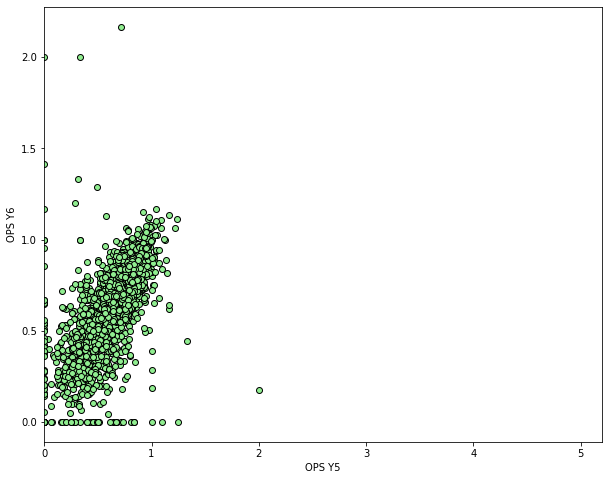

In [4]:
scatter_plot('OPS Y1', 'OPS Y6')
scatter_plot('OPS Y2', 'OPS Y6')
scatter_plot('OPS Y3', 'OPS Y6')
scatter_plot('OPS Y4', 'OPS Y6')
scatter_plot('OPS Y5', 'OPS Y6')

We can see there is a tighter line forming the closer we get to the sixth year. In particular, years three through five are of interest.

Next we'll look at the first five seasons with respect to the tenth season's OPS.

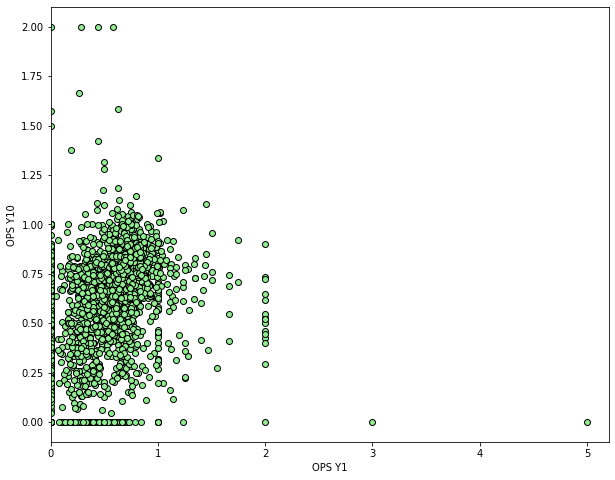

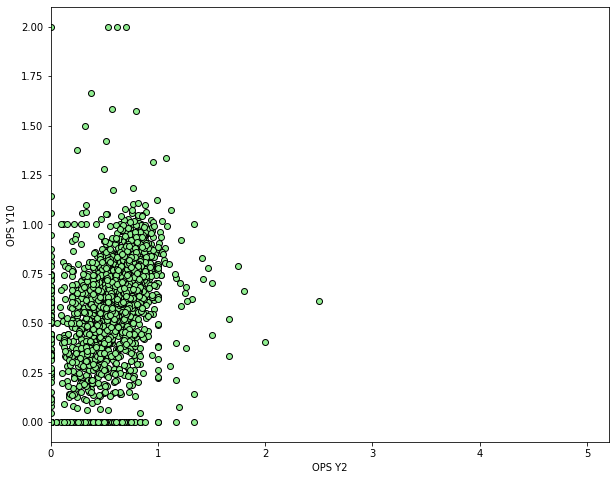

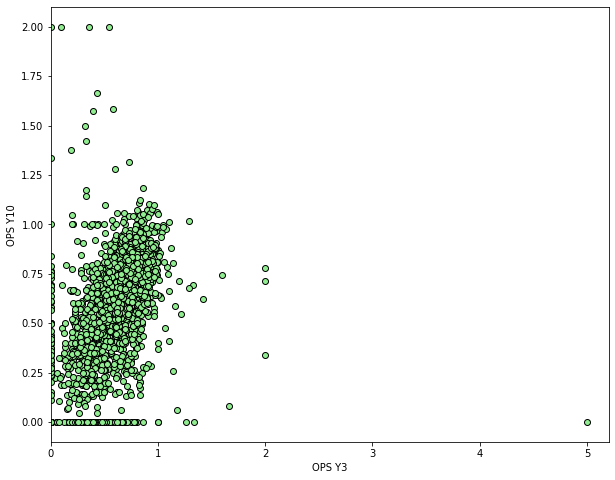

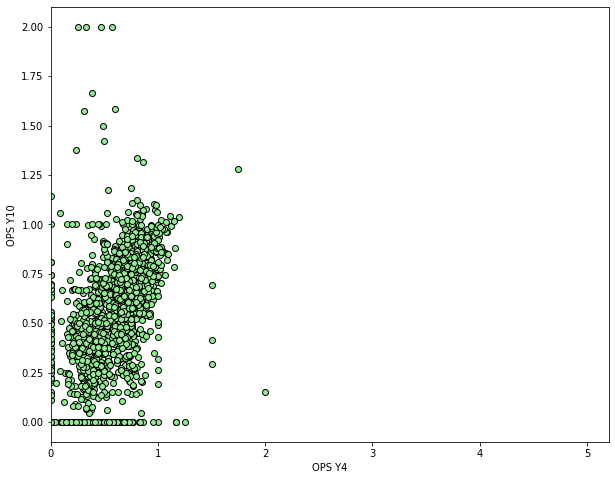

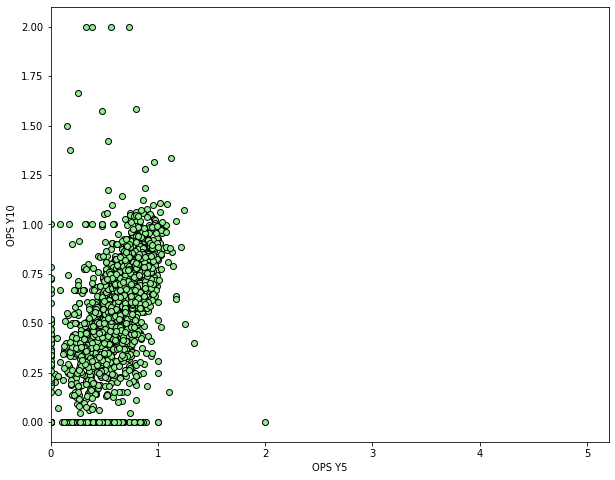

In [5]:
scatter_plot('OPS Y1', 'OPS Y10')
scatter_plot('OPS Y2', 'OPS Y10')
scatter_plot('OPS Y3', 'OPS Y10')
scatter_plot('OPS Y4', 'OPS Y10')
scatter_plot('OPS Y5', 'OPS Y10')

Here, we see a similar pattern with the OPS values from seasons closer to the tenth season seem to have more definition, however it isn't as tightly formed in the plots as with the sixth season.

Finally, we'll look for relationships with the overall career OPS of a player. (Keeping in mind that this represents a value for both completed and in-progress careers.)

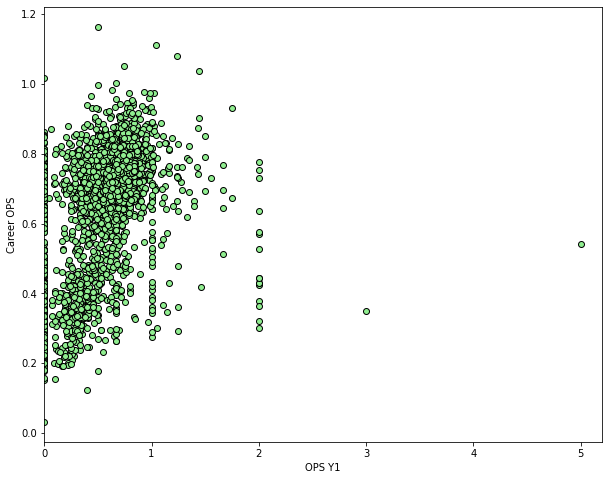

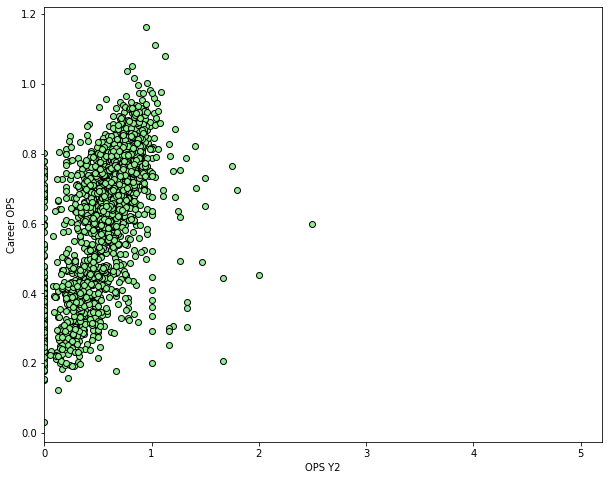

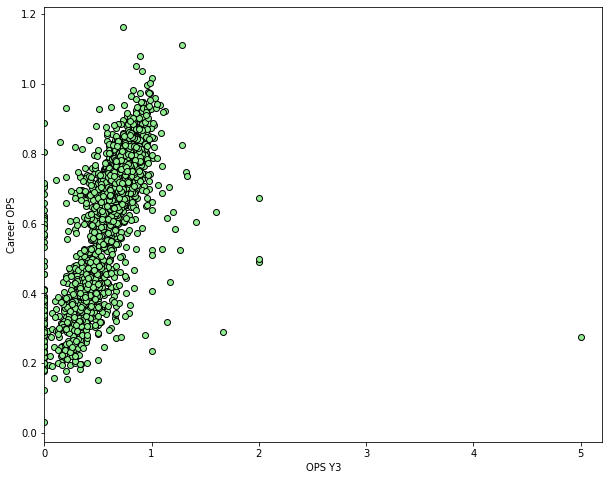

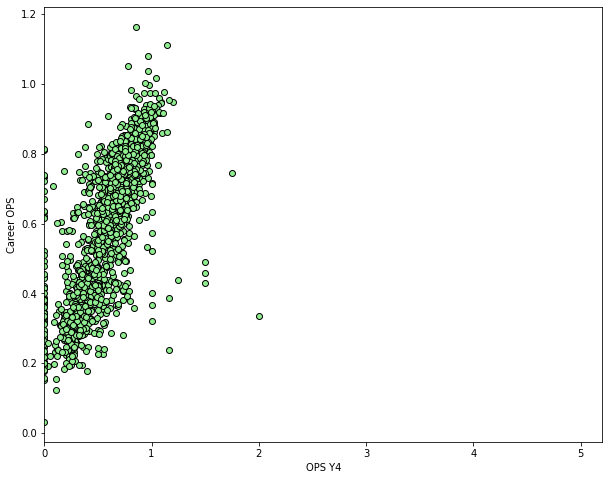

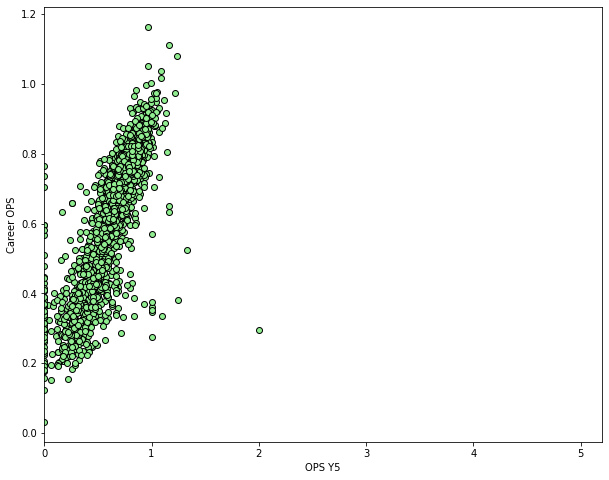

In [6]:
scatter_plot('OPS Y1', 'Career OPS')
scatter_plot('OPS Y2', 'Career OPS')
scatter_plot('OPS Y3', 'Career OPS')
scatter_plot('OPS Y4', 'Career OPS')
scatter_plot('OPS Y5', 'Career OPS')

We see much tigheter lines forming up for the career OPS values, especially for the third, fourth, and fifth sesaons, than we do for the others.

I'm surprised by these results. I anticipated the 6th season OPS and/or the 10th season OPS value to be more strongly correalated than the Career OPS, but it looks like Career OPS is more strongly related. I thought it would be stronger between consecutive seasons than this tends to indicate.

Let's build three models, both with the 3rd, 4th, and 5th season OPS values as features.

Model 1 (M1) will aim to predict the 6th season OPS.
Model 2 (M2) will aim to predict the 10th season OPS.
Model 3 (M3) will aim to predict the player's Career OPS.

Based on these plots, we might expect to see the most accuracy with M3. Let's try and see.

## Data Preparation

First, we'll build the dataframes, features, and targets we need. This will be used as X for all models.

In [7]:
X = all_data[['OPS Y3', 'OPS Y4', 'OPS Y5']]
X

,OPS Y3,OPS Y4,OPS Y5
0,0.367510,0.496266,0.379030
1,0.578379,0.470550,0.731898
2,0.462535,0.260180,0.455696
3,0.363387,0.473844,0.475806
4,0.730611,0.856730,0.967903
...,...,...,...
2394,0.533333,0.583502,0.730326
2395,0.784906,0.658537,0.527451
2396,0.617196,0.659624,0.689723
2397,0.692806,0.613224,0.701352


In [8]:
X = X.values
X

array([[0.36751027, 0.49626623, 0.37903   ],
       [0.57837942, 0.47055016, 0.73189763],
       [0.46253469, 0.2601798 , 0.4556962 ],
       ...,
       [0.61719577, 0.6596236 , 0.68972288],
       [0.69280632, 0.61322418, 0.70135209],
       [0.72784427, 0.75575808, 0.81609157]])

Next, we need three target array, which will be numbered to make the model they correspond with.

The target array for `'OPS Y6'` (Model 1) is `y1`.

In [9]:
y1 = all_data['OPS Y6']
y1 = y1.values
y1

array([0.77465536, 0.40091954, 0.51955108, ..., 0.75180997, 0.73253938,
       0.76659642])

The target array for `'OPS Y10'` (Model 2) is `y2`.

In [10]:
y2 = all_data['OPS Y10']
y2 = y2.values
y2

array([0.53333333, 0.63438735, 0.61133342, ..., 0.55775399, 0.67149339,
       0.93949936])

The target array for `'Career OPS'` (Model 3) is `y3`.

In [11]:
y3 = all_data['Career OPS']
y3 = y3.values
y3

array([0.52651137, 0.55315806, 0.57998739, ..., 0.68269696, 0.70059903,
       0.80664911])

## Building Models

Importing evaluation metrics, which will be used throughout this notebook.

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Model 1 (M1)

We'll split the data into three sets for this approach, training, validation, and testing.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)
X_validate, X_test, y1_validate, y1_test = train_test_split(X_test, y1_test, test_size = 0.5, random_state = 42)

The performance of the model
--------------------------------------
MAE is 0.111
RMSE is 0.190
R-Squared is 0.408


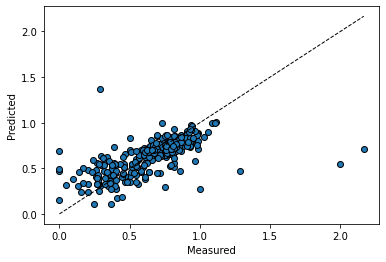

In [14]:
from sklearn.linear_model import LinearRegression

M1 = LinearRegression()
M1.fit(X_train, y1_train)

y1_predict_validate = M1.predict(X_validate)

mae = mean_absolute_error(y1_validate, y1_predict_validate)
rmse = (np.sqrt(mean_squared_error(y1_validate, y1_predict_validate)))
r2 = r2_score(y1_validate, y1_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

fig, ax = plt.subplots()
ax.scatter(y1_validate, y1_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], "k--", lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

### Model 2 (M2)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.3, random_state = 42)
X_validate, X_test, y2_validate, y2_test = train_test_split(X_test, y2_test, test_size = 0.5, random_state = 42)


The performance of the model
--------------------------------------
MAE is 0.148
RMSE is 0.238
R-Squared is 0.295


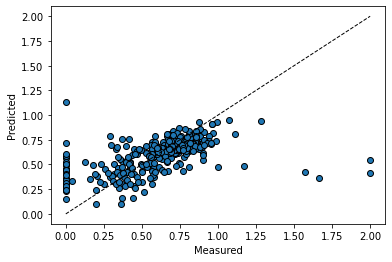

In [16]:
from sklearn.linear_model import LinearRegression

M2 = LinearRegression()
M2.fit(X_train, y2_train)

y2_predict_validate = M2.predict(X_validate)

mae = mean_absolute_error(y2_validate, y2_predict_validate)
rmse = (np.sqrt(mean_squared_error(y2_validate, y2_predict_validate)))
r2 = r2_score(y2_validate, y2_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

fig, ax = plt.subplots()
ax.scatter(y2_validate, y2_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y2.min(), y2.max()], [y2.min(), y2.max()], "k--", lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

### Model 3 (M3)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size = 0.3, random_state = 42)
X_validate, X_test, y3_validate, y3_test = train_test_split(X_test, y3_test, test_size = 0.5, random_state = 42)

The performance of the model
--------------------------------------
MAE is 0.051
RMSE is 0.087
R-Squared is 0.769


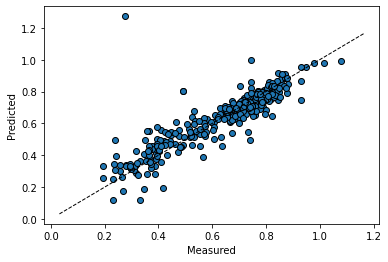

In [18]:
from sklearn.linear_model import LinearRegression

M3 = LinearRegression()
M3.fit(X_train, y3_train)

y3_predict_validate = M3.predict(X_validate)

mae = mean_absolute_error(y3_validate, y3_predict_validate)
rmse = (np.sqrt(mean_squared_error(y3_validate, y3_predict_validate)))
r2 = r2_score(y3_validate, y3_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

fig, ax = plt.subplots()
ax.scatter(y3_validate, y3_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], "k--", lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

After observing the results of the initial three models, we can see a very strong linear correalation but also the strongest predictor is clear. For the remainder of this approach, we will continue to attempt to develop a model which will predict career batting success based on third, fourth, and fifth year OPS statistics.

## Improving M3

Let's capture the R-Squared values for our M3 variants in `M3_results`.

In [19]:
M3_results = []

### M3 - LassoCV

The performance of the model
--------------------------------------
MAE is 0.051
RMSE is 0.087
R-Squared is 0.769


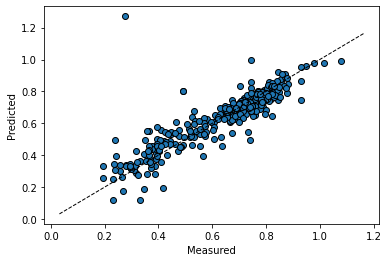

In [20]:
from sklearn.linear_model import LassoCV

M3_LassoCV = LassoCV(cv = 10)
M3_LassoCV.fit(X_train, y3_train)

y3_predict_validate = M3_LassoCV.predict(X_validate)

mae = mean_absolute_error(y3_validate, y3_predict_validate)
rmse = (np.sqrt(mean_squared_error(y3_validate, y3_predict_validate)))
r2 = r2_score(y3_validate, y3_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

M3_results.append(['LassoCV', r2])

fig, ax = plt.subplots()
ax.scatter(y3_validate, y3_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], "k--", lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M3_LassoCV, X, y3, cv=10, scoring='r2')
scores

array([0.84874647, 0.8382762 , 0.76874908, 0.83572902, 0.81827066,
       0.78121268, 0.81293183, 0.86164359, 0.68518216, 0.76446363])

In [22]:
np.mean(scores)

0.801520531514973

In [23]:
M3_results.append(['LassoCV +CV', np.mean(scores)])

### M3 - RidgeCV

The performance of the model
--------------------------------------
MAE is 0.051
RMSE is 0.087
R-Squared is 0.768


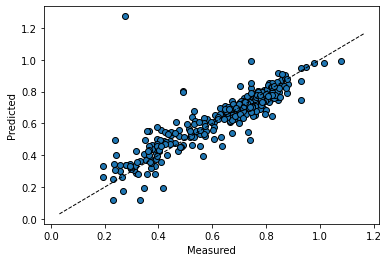

In [24]:
from sklearn.linear_model import RidgeCV

M3_Ridge = RidgeCV(cv = 10)
M3_Ridge.fit(X_train, y3_train)

y3_predict_validate = M3_Ridge.predict(X_validate)

mae = mean_absolute_error(y3_validate, y3_predict_validate)
rmse = (np.sqrt(mean_squared_error(y3_validate, y3_predict_validate)))
r2 = r2_score(y3_validate, y3_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

M3_results.append(['RidgeCV', r2])

fig, ax = plt.subplots()
ax.scatter(y3_validate, y3_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], "k--", lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M3_Ridge, X, y3, cv=10, scoring='r2')
scores

array([0.84878001, 0.83788183, 0.76863991, 0.83704654, 0.8182611 ,
       0.78199458, 0.81321828, 0.86223907, 0.68767312, 0.76400719])

In [26]:
np.mean(scores)

0.8019741631606762

In [27]:
M3_results.append(['RidgeCV +CV', np.mean(scores)])

### M3 - Gradient Boosting

The performance of the model
--------------------------------------
MAE is 0.045
RMSE is 0.063
R-Squared is 0.878


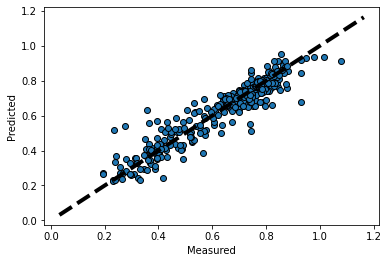

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

M3_GradBoost = GradientBoostingRegressor()
M3_GradBoost.fit(X_train, y3_train)

y3_predict_validate = M3_GradBoost.predict(X_validate)

mae = mean_absolute_error(y3_validate, y3_predict_validate)
rmse = (np.sqrt(mean_squared_error(y3_validate, y3_predict_validate)))
r2 = r2_score(y3_validate, y3_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

M3_results.append(['GradBoost', r2])

fig, ax = plt.subplots()
ax.scatter(y3_validate, y3_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M3_GradBoost, X, y3, cv=10, scoring='r2')
scores

array([0.8406027 , 0.86754565, 0.85514288, 0.89075296, 0.80874477,
       0.80304842, 0.84588414, 0.88606797, 0.84732913, 0.89776269])

In [30]:
np.mean(scores)

0.8542881306351271

In [31]:
M3_results.append(['GradBoost +CV', np.mean(scores)])

### M5 - Grad Boost w/ CV

The performance of the model
--------------------------------------
MAE is 0.044
RMSE is 0.062
R-Squared is 0.880


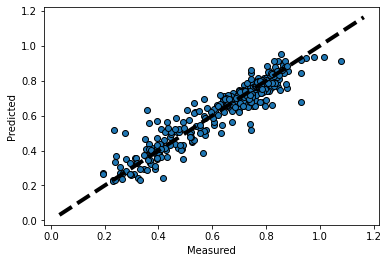

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RepeatedKFold

M3_GradBoost_K = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

n_scores = cross_val_score(M3_GradBoost_K, X_train, y3_train, scoring='r2', cv=10, n_jobs=-1, error_score='raise')

M3_GradBoost_K.fit(X_train, y3_train)

y3_predict_validate = M3_GradBoost_K.predict(X_validate)

mae = mean_absolute_error(y3_validate, y3_predict_validate)
rmse = (np.sqrt(mean_squared_error(y3_validate, y3_predict_validate)))
r2 = r2_score(y3_validate, y3_predict_validate)

M3_results.append(['GradBoost_K', r2])

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

fig, ax = plt.subplots()
ax.scatter(y3_validate, y3_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M3_GradBoost_K, X, y3, cv=10, scoring='r2')
scores

array([0.84059049, 0.86811376, 0.85508795, 0.88755343, 0.81034547,
       0.80485759, 0.84575416, 0.88627712, 0.84612676, 0.89807104])

In [34]:
np.mean(scores)

0.8542777773140523

In [35]:
M3_results.append(['GradBoost_K +CV', np.mean(scores)])

#### GridSearchCV for SVR

In [36]:
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"]

for score in scores:
    print("#### Tuning Hyper-Parameters for",score)
    print()

    clf = GridSearchCV(SVR(), tuned_parameters, scoring="%s" % score)
    clf.fit(X, y3)

    print("Best parameters on dataset (X):",clf.best_params_)
    print("\nGrid scores on dataset (X):")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("\t%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("\n\n")


#### Tuning Hyper-Parameters for neg_mean_absolute_error

Best parameters on dataset (X): {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on dataset (X):
	-0.077 (+/-0.013) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.123 (+/-0.025) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.056 (+/-0.009) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.077 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.052 (+/-0.008) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.056 (+/-0.009) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.052 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.052 (+/-0.008) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.052 (+/-0.008) for {'C': 1, 'kernel': 'linear'}
	-0.052 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
	-0.052 (+/-0.008) for {'C': 100, 'kernel': 'linear'}
	-0.052 (+/-0.008) for {'C': 1000, 'kernel': 'linear'}



#### Tuning Hyper-Parameters for neg_root_mean_squared_error

Best parameters on da

### M3 - SVR with GridSearchCV results

The performance of the model
--------------------------------------
MAE is 0.050
RMSE is 0.074
R-Squared is 0.829


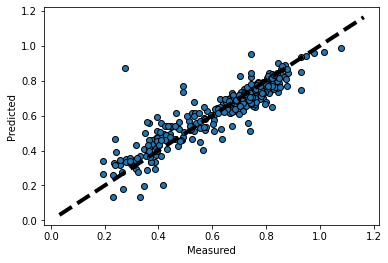

In [37]:
from sklearn.svm import SVR

M3_SVR_Grid = SVR(kernel='rbf', gamma=0.001, C=1000)
M3_SVR_Grid.fit(X_train, y3_train)

y3_predict_validate = M3_SVR_Grid.predict(X_validate)

mae = mean_absolute_error(y3_validate, y3_predict_validate)
rmse = (np.sqrt(mean_squared_error(y3_validate, y3_predict_validate)))
r2 = r2_score(y3_validate, y3_predict_validate)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

M3_results.append(['SVR_Grid', r2])

fig, ax = plt.subplots()
ax.scatter(y3_validate, y3_predict_validate, edgecolors=(0, 0, 0))
ax.plot([y3.min(), y3.max()], [y3.min(), y3.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M3_SVR_Grid, X, y3, cv=10, scoring='r2')
scores

array([0.85228539, 0.8418251 , 0.78732807, 0.83792045, 0.81727625,
       0.78232767, 0.80383497, 0.86148854, 0.70850473, 0.84258461])

In [39]:
np.mean(scores)

0.813537580212165

In [40]:
M3_results.append(['SVR_Grid +CV', np.mean(scores)])

### Summary of M3 variants

In [41]:
for row in M3_results:
    print(row[0],"\tR2 = ",row[1])

LassoCV 	R2 =  0.7687281456470731
LassoCV +CV 	R2 =  0.801520531514973
RidgeCV 	R2 =  0.7680590976606798
RidgeCV +CV 	R2 =  0.8019741631606762
GradBoost 	R2 =  0.8778472943671068
GradBoost +CV 	R2 =  0.8542881306351271
GradBoost_K 	R2 =  0.8797601177236948
GradBoost_K +CV 	R2 =  0.8542777773140523
SVR_Grid 	R2 =  0.8291166710498572
SVR_Grid +CV 	R2 =  0.813537580212165


## Model Evaluation with Test Data

In [43]:
y3_predict_test = M3_GradBoost.predict(X_test)

mae = mean_absolute_error(y3_test, y3_predict_test)
rmse = (np.sqrt(mean_squared_error(y3_test, y3_predict_test)))
r2 = r2_score(y3_test, y3_predict_test)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.046
RMSE is 0.064
R-Squared is 0.868


In [48]:
y3_predict_test = M3_GradBoost_K.predict(X_test)

mae = mean_absolute_error(y3_test, y3_predict_test)
rmse = (np.sqrt(mean_squared_error(y3_test, y3_predict_test)))
r2 = r2_score(y3_test, y3_predict_test)

print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))

The performance of the model
--------------------------------------
MAE is 0.046
RMSE is 0.064
R-Squared is 0.868


## Evaluation Based on Context

How good is our selected model at correctly identifying ABOVE AVERAGE hitters, or better? If we consider the measure mentioned in the introduction, then in a bigger way we're interested in if the model is generally good at identifying if a player is above average, or better.

So, this question becomes less about what the specific value of the OPS is and more about if the player is predicted correctly as being above average (based on predicted OPS) or not.

This last function is a test looking for the number of accurately classified players, in the general sense. For example, if a batter's predicted OPS is above average but their actual OPS is below average, then this would not be considered a correct prediction.

In [56]:
def general_classification_accuracy(actual, prediction):
    if len(actual) == len(prediction):
        i = 0
        correct_classifications = 0
        
        while i < len(actual):
            actual_ops = actual[i]
            predicted_ops = prediction[i]

            if ((actual_ops > 0.7666) and (predicted_ops > 0.7666)) or \
                ((actual_ops <= 0.7666) and (predicted_ops <= 0.7666)):
                correct_classifications += 1
                
            i+=1
                
    return correct_classifications/(len(actual)*1.0)


general_classification_accuracy(y3_test, y3_predict_test)

0.8611111111111112

It is interesting to note that this metric is very similar to the R-Squared score.

What this metric shows us is that the model correctly identifies players as either above or below average 86.1% of the time. While it isn't a deeply meaningful metric, it is worth examining since it both confirms the model as generally accurate model. Generally speaking, this seems like an acceptable model to me, albeit a very naive one in the larger world of baseball data and sabermetrics.

### Comparison of the Hall of Fame Approach and the OPS Approach

The OPS Approach is generally a good indicator of future batting success over a player's career, but not a stellar one. It is definitely more reliable than the Hall of Fame Approach for predicting batting success and is far more tangible in nature.

The challenge with the Hall of Fame Approach is the very complicated world of selection and voting and things not on paper, statistically speaking, that play into whether or not a player is inducted. While at first thought it seemed like a valuable approach (after all, there aren't too many mediocre batters in the Hall of Fame) it was thoroughly flawed and not generally helpful for predicting those who will have moderate batting success throughout their careers but will not end up as Hall of Fame superstars.

The surprise with the OPS Approach was how the strongest approach was to predict the Career OPS and not an OPS for a season that was more near-term in the future. The challenge with this approach is likely that of the many additional dynamics of play that it does not account for, even with respect to batting. For instance, a player may not have a high OPS but still be a very effective batter that contributes well to the team. This model would not be able to predict those player's successes at the plate because we were examining too specific of a measure. However, overall, this is a valuable, albeit imperfect, statistic for general use.